# IntroStat Week 4 

Welcome to the 4th lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 4.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Simulation: Distribution of the sample mean

In [2]:
# Plot histogram of 10 random values (normally distributed)

# 'True' values in theoretical population
mu = 178
sigma = 12

# size of sample
n = 10

In [3]:
# Draw 10 random numbers
x = stats.norm.rvs(mu, sigma, size=n)
print(x)

[179.82707892 178.20767257 182.46488274 171.07720898 187.32903215
 197.17521456 184.21075837 180.77229827 174.13926879 153.27419507]


179.27327882316763


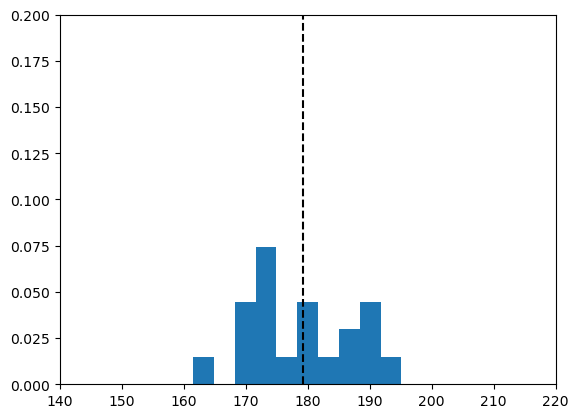

In [42]:
# calculate sample mean and plot
x = stats.norm.rvs(mu, sigma, size=n)
print(x.mean())

# Plot histogram 
plt.hist(x, density=True)
plt.xlim(140,220)
plt.ylim(0,0.20)
plt.axvline(x.mean(), linestyle='--', color="black")
plt.show()

In [43]:
# Repeat 100 times and plot histogram of the mean values

# Draw (10 x 100) random numbers
mat = stats.norm.rvs(mu, sigma, size=(n,100))

# Calculate sample mean of each column 
xbar = mat.mean(axis=0)

print(xbar)

[180.60027864 181.29683986 174.45533721 180.66506284 176.87985747
 176.76177991 178.43760298 174.33004432 176.47993099 179.24602748
 177.66853799 179.55885716 175.7188742  172.89869884 180.51018871
 175.09779375 178.70234609 177.6498537  177.42813357 176.35302623
 179.95075269 181.45906671 180.40786393 176.35012412 179.63566486
 175.59576223 174.71202913 178.07285486 178.93833845 176.94920664
 176.93243606 171.90262035 181.53458611 179.6786236  182.26002098
 179.92766271 173.14610763 179.29283012 173.518292   178.39268114
 177.03179828 179.67707292 174.84501793 178.3355152  173.83918313
 174.95480115 175.83349102 177.67331649 177.09519333 177.2758027
 180.18794256 178.8212116  176.94703437 176.54865132 179.85032447
 180.4994606  179.51403508 186.16406835 178.22256641 179.56672509
 178.72694587 177.98080064 178.4107942  182.24441411 177.99535289
 182.79349613 177.99649607 179.09069572 177.90758469 174.38865664
 177.12691628 180.75039887 180.17302002 176.82429285 174.51324784
 176.431100

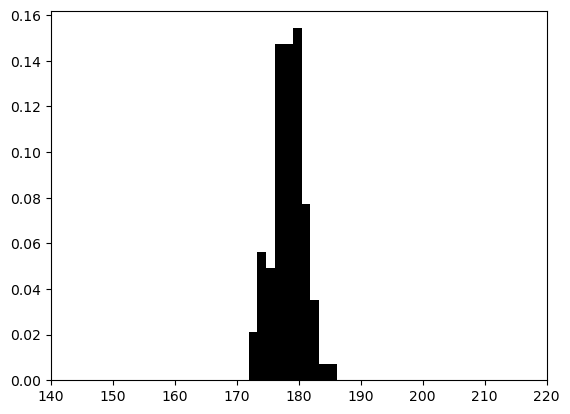

In [44]:
# Plot histogram of the mean values
plt.hist(xbar, density=True, color="black")
plt.xlim(140,220)
plt.show()


### t-distribution

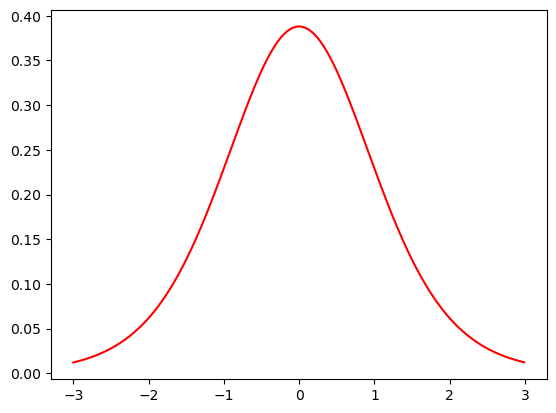

In [7]:
# Plot the t-distribution
plt.plot(np.arange(-3,3,.01), stats.t.pdf(np.arange(-3,3,.01), df=9), color="red")
plt.show()

### Example: find correct quantile in t(9)-distribution

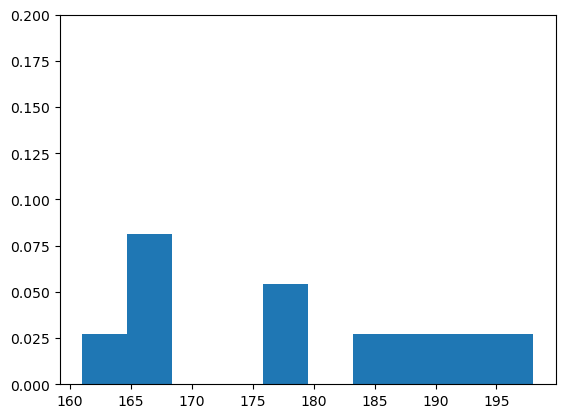

In [8]:
height_data = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
xrange = np.arange(140, 220, .1)
plt.hist(height_data, density=True)
plt.ylim(0,.2)
plt.show()

In [9]:
# calculate mean (xbar) and sample standard deviation (S)
xbar = height_data.mean()
s = height_data.std(ddof=1)
print(xbar)
print(s)

178.0
12.211106056009468


In [10]:
t_lower = stats.t.ppf(.025,df=9)
print(t_lower)

-2.2621571628540997


In [11]:
t_upper = stats.t.ppf(.975,df=9)
print(t_upper)

2.2621571628540993


In [12]:
mu_lower = xbar + t_lower*s/np.sqrt(10)
mu_upper = xbar + t_upper*s/np.sqrt(10)
print([mu_lower, mu_upper])

[169.26470095307758, 186.73529904692242]


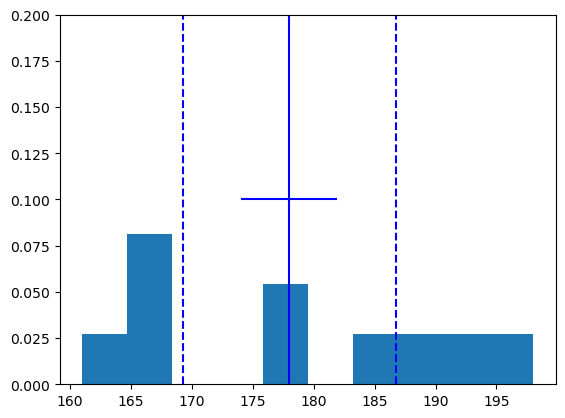

In [13]:
# visualise the confidence interval
xrange = np.arange(140, 220, .1)
plt.hist(height_data, density=True)
plt.axvline(xbar, linestyle='-', color="blue", ymin=0, ymax=1)
plt.plot([xbar-s/np.sqrt(10), xbar+s/np.sqrt(10)], [0.1,0.1], linestyle='-', color="blue")
plt.axvline(mu_lower, linestyle='--', color="blue", ymin=0, ymax=1)
plt.axvline(mu_upper, linestyle='--', color="blue", ymin=0, ymax=1)
plt.ylim(0,.2)
plt.show()

We can also calcualte a 99%-confidence interval for our mean student height

Will it be wider or narrower ?

Try to calculate the 99% interval using Python

In [45]:


# Given data
height_data = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])

# Calculate the sample mean and standard deviation
xbar = np.mean(height_data)
s = np.std(height_data, ddof=1)

# Sample size
n = len(height_data)

# Get the t-value for 99% confidence
t_value = stats.t.ppf(0.995, df=n-1)  # Two-tailed, hence 0.995 not 0.99

# Calculate the margin of error
margin_error = t_value * (s / np.sqrt(n))

# Confidence interval
ci_lower = xbar - margin_error
ci_upper = xbar + margin_error

print("99% Confidence Interval: [{}, {}]".format(ci_lower, ci_upper))


99% Confidence Interval: [165.45078999139582, 190.54921000860418]


### Simulation: Distribution of the sample variance

[173.72675698 164.91035875 178.05996288 175.93688032 174.39442915
 162.06738064 182.4711142  172.13002615 167.0719804  165.47393474]
38.49815051392954
144


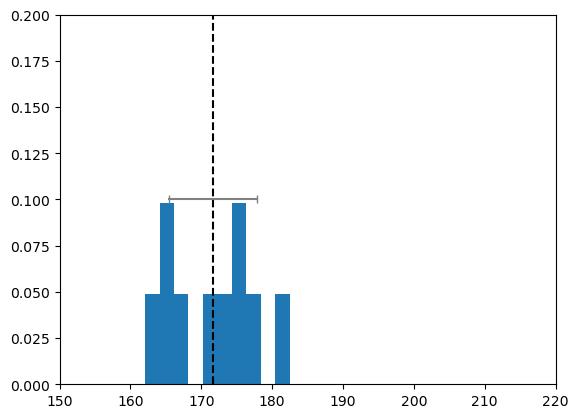

In [46]:
# Back to simulation of student heights
mu = 178
sigma = 12
n = 10

# calculate sample VARIANCE
x = stats.norm.rvs(mu, sigma, size=n)
print(x)
print(x.var())
print(sigma**2)

# Plot histogram 
plt.hist(x, density=True)
plt.xlim(150,220)
plt.ylim(0,0.20)
plt.axvline(x.mean(), linestyle='--', color="black")
plt.plot([x.mean()-x.std(),x.mean()+x.std()], [.1, .1], '|', linestyle="-", color='grey')
plt.show()

Not only sample mean changes for each simulation - also the sample variance changes.

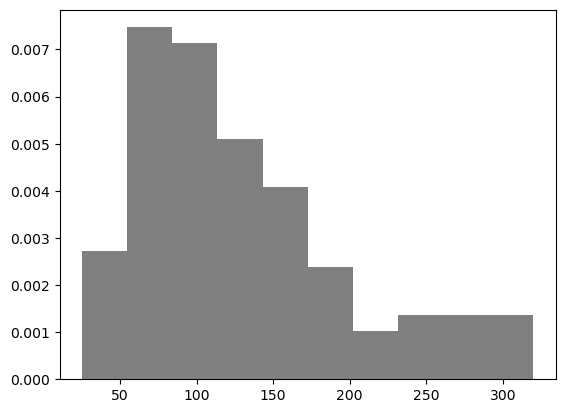

In [15]:
# Repeat 100 times and plot histogram of the variance values

# Draw (10 x 100) random numbers
mat = stats.norm.rvs(mu, sigma, size=(n,100))

# Calculate sample mean of each column 
s2 = mat.var(axis=0)

plt.hist(s2, density=True, color="grey")
plt.show()

The variance is always positive and does not follow a normal distribution. <br>
The distribution of variance is not symmestric. 

### Example: Variance of student heights 

In [16]:
# A random sample of n = 10 student height have the following sample mean and variance:
height_data = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
xbar = height_data.mean()
s = height_data.std(ddof=1)
n=10

var_hat = s**2
print(var_hat)

149.11111111111111


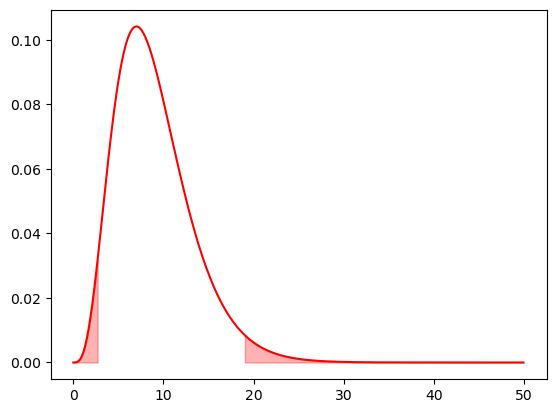

In [17]:
# plot chi-square distribution with n-1 = 9 degrees of freedom
plt.plot(np.arange(0,50,.1), stats.chi2.pdf(np.arange(0,50,.1), df=(n-1), loc=0, scale=1), color="red")
xint = np.arange(0, stats.chi2.ppf(0.025, df=(n-1), loc=0, scale=1), .01)
plt.fill_between(xint, stats.chi2.pdf(xint, df=(n-1), loc=0, scale=1), color='red', alpha=0.3)
xint = np.arange(stats.chi2.ppf(0.975, df=(n-1), loc=0, scale=1), 50, .01)
plt.fill_between(xint, stats.chi2.pdf(xint, df=(n-1), loc=0, scale=1), color='red', alpha=0.3)
plt.show()

In [18]:
chi2_lower = stats.chi2.ppf(0.025, df=(n-1), loc=0, scale=1)
chi2_upper = stats.chi2.ppf(0.975, df=(n-1), loc=0, scale=1)

print([chi2_lower, chi2_upper])

[2.7003894999803584, 19.02276779864163]


In [19]:
# confidence interval for the variance
print(var_hat)
print((n-1)*var_hat/chi2_lower)
print((n-1)*var_hat/chi2_upper)

149.11111111111111
496.96534518807795
70.5470420606106


In [20]:
# confidence interval for the standard deviation
print(np.sqrt(var_hat))
print(np.sqrt((n-1)*var_hat/chi2_lower))
print(np.sqrt((n-1)*var_hat/chi2_upper))

12.211106056009468
22.29271955567732
8.399228658669236


Notice the interval is not symmetric

### CLT in action

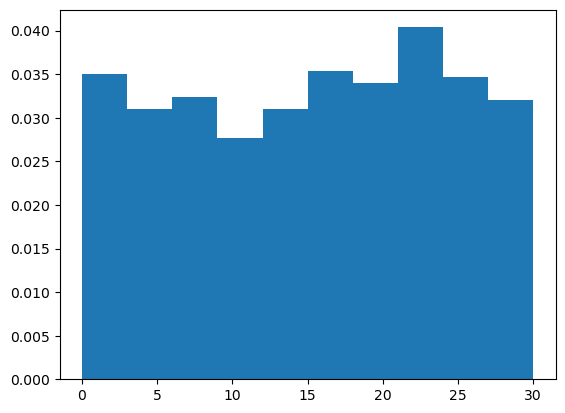

In [21]:
n=1
k=1000
u = stats.uniform.rvs(loc=0, scale=30, size=(n,k))

mean_values = u.mean(axis=0)

plt.hist(mean_values, density=True)
plt.show()

Now increase n to 2,3,6,30

We can also try with another distribution

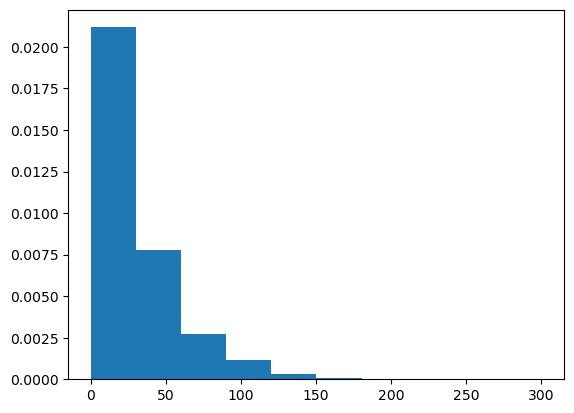

In [22]:
n=1
k=1000
u = stats.expon.rvs(loc=0, scale=30, size=(n,k))
mean_values = u.mean(axis=0)

plt.hist(mean_values, density=True)
plt.show()

Now increase n to 2,3,6,30

### Example: Exam question from 2016 

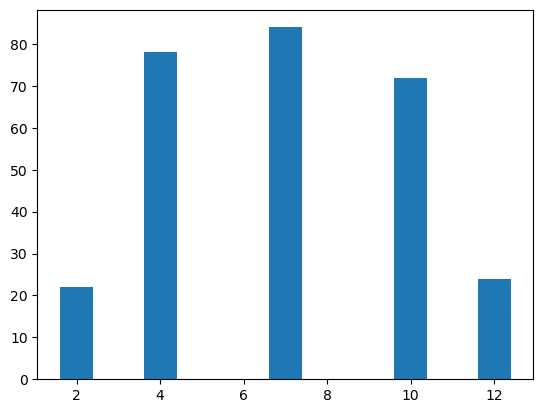

In [59]:
grades = np.array([2,4,7,10,12])
count = np.array([22,78,84,72,24])
plt.bar(grades,count)
plt.show()

In [60]:
# calculate average (mean) grade:
avg_grade = np.sum(np.array(grades)*np.array(count)/280)
print(avg_grade)

7.0
6.9714285714285715


In [61]:
grades-avg_grade

array([-4.97142857, -2.97142857,  0.02857143,  3.02857143,  5.02857143])

In [63]:
# calculate variance of grades:
var_grade = 1/(280-1)*np.sum(np.array(count) * (grades-avg_grade)**2)
print(var_grade)

8.959754224270354


In [27]:
avg_grade_standard_error = np.sqrt(var_grade)/np.sqrt(280)
print(avg_grade_standard_error)

0.17888298474012831


In [28]:
t_upper = stats.t.ppf(0.975, df=280-1)
print(t_upper)

1.968503126548004


In [29]:
print(avg_grade - t_upper*avg_grade_standard_error)
print(avg_grade + t_upper*avg_grade_standard_error)

6.61929685668139
7.323560286175753


### Example: Production of tablets 

In [30]:
# A random sample of n = 20 have the following sample mean and variance:

n = 20
mu_hat = 1.01
var_hat = 0.07**2

print(var_hat)

0.004900000000000001


We need to give a confidence interval on the estimate of var_hat

We choose a 95% confidence interval

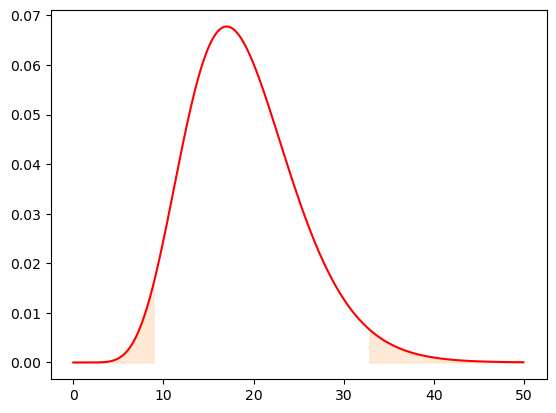

In [31]:
# plot chi-square distribution and visualise the limits of chi^2

# we need the distribution of n-1 = 19 degrees of freedom

plt.plot(np.arange(0,50,.1), stats.chi2.pdf(np.arange(0,50,.1), df=(n-1), loc=0, scale=1), color="red")
xint = np.arange(0, stats.chi2.ppf(0.025, df=(n-1), loc=0, scale=1), .01)
plt.fill_between(xint, stats.chi2.pdf(xint, df=(n-1), loc=0, scale=1), color='peachpuff', alpha=0.6)
xint = np.arange(stats.chi2.ppf(0.975, df=(n-1), loc=0, scale=1), 50, .01)
plt.fill_between(xint, stats.chi2.pdf(xint, df=(n-1), loc=0, scale=1), color='peachpuff', alpha=0.6)
plt.show()

In [32]:
chi2_lower = stats.chi2.ppf(0.025, df=(n-1), loc=0, scale=1)
chi2_upper = stats.chi2.ppf(0.975, df=(n-1), loc=0, scale=1)

print([chi2_lower,chi2_upper])

[8.906516481987971, 32.85232686172969]


In [33]:
# confidence interval for the variance
print(var_hat)
print((n-1)*var_hat/chi2_lower)
print((n-1)*var_hat/chi2_upper)

0.004900000000000001
0.010453020570756269
0.002833893635353239


In [34]:
# confidence interval for the standard deviation
print(np.sqrt(var_hat))
print(np.sqrt((n-1)*var_hat/chi2_lower))
print(np.sqrt((n-1)*var_hat/chi2_upper))

0.07
0.10224001452834536
0.053234327603091214
